# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


# Data Validation

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [2]:
sales.shape

(15000, 8)

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [5]:
sales['week'] = sales['week'].astype(int)
sales['sales_method'] = sales['sales_method'].astype('category')
sales['customer_id'] = sales['customer_id'].astype(str)
sales['nb_sold'] = sales['nb_sold'].astype(int)
sales['revenue'] = sales['revenue'].astype(float).round(2)
sales['years_as_customer'] = sales['years_as_customer'].astype(int)
sales['nb_site_visits'] = sales['nb_site_visits'].astype(int)
sales['state'] = sales['state'].astype('category')

In [6]:
sales.dtypes

week                    int64
sales_method         category
customer_id            object
nb_sold                 int64
revenue               float64
years_as_customer       int64
nb_site_visits          int64
state                category
dtype: object

In [7]:
for column in sales.columns:
    unique_values = sales[column].unique()  # Get unique values in the column
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("-------------------------------------")


Column: week
Unique values: [2 6 5 4 3 1]
-------------------------------------
Column: sales_method
Unique values: ['Email', 'Email + Call', 'Call', 'em + call', 'email']
Categories (5, object): ['Call', 'Email', 'Email + Call', 'em + call', 'email']
-------------------------------------
Column: customer_id
Unique values: ['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
-------------------------------------
Column: nb_sold
Unique values: [10 15 11  9 13  8 12  7 14 16]
-------------------------------------
Column: revenue
Unique values: [   nan 225.47  52.55 ...  44.34  45.01  64.9 ]
-------------------------------------
Column: years_as_customer
Unique values: [ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
----

In [8]:
numerical_columns = sales.select_dtypes(include=[float, int])  # Select numerical columns
numerical_stats = numerical_columns.describe().T  # Get the summary statistics for numerical columns
print(numerical_stats)   

                     count       mean        std  ...   50%       75%     max
week               15000.0   3.098267   1.656420  ...   3.0    5.0000    6.00
nb_sold            15000.0  10.084667   1.812213  ...  10.0   11.0000   16.00
revenue            13926.0  93.934943  47.435312  ...  89.5  107.3275  238.32
years_as_customer  15000.0   4.965933   5.044952  ...   3.0    7.0000   63.00
nb_site_visits     15000.0  24.990867   3.500914  ...  25.0   27.0000   41.00

[5 rows x 8 columns]


In [9]:
corrections = {
    'em + call': 'Email + Call',
    'email': 'Email'}

sales['sales_method'] = sales['sales_method'].replace(corrections)
sales['sales_method'].unique()

['Email', 'Email + Call', 'Call']
Categories (3, object): ['Call', 'Email', 'Email + Call']

In [10]:
data = sales.copy()

sales_methods_of_interest = ['Email', 'Email + Call', 'Call']

# Filter data for the specified sales methods
filtered_data = data[data['sales_method'].isin(sales_methods_of_interest)]

# Calculate the count of each sales method
sales_method_counts = filtered_data['sales_method'].value_counts()

# Calculate the number of missing values for each sales method
missing_values_by_sales_method = filtered_data.groupby('sales_method')['revenue'].apply(lambda x: x.isnull().sum())


In [11]:
sales_method_counts

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [12]:
missing_values_by_sales_method

sales_method
Call            181
Email           544
Email + Call    349
Name: revenue, dtype: int64

In [13]:
import pandas as pd

# Create a dictionary with data for three columns
data = {
    'sales_method': ['Call', 'Email','Email + Call'],
    'sales_method_missing_values': [181, 544, 349],
    'sales_method_counts': [7466,4962,2572]}
df = pd.DataFrame(data)
df['Percentage Missing'] = (df['sales_method_missing_values'] / df['sales_method_counts']) * 100
df

,sales_method,sales_method_missing_values,sales_method_counts,Percentage Missing
0,Call,181,7466,2.424324
1,Email,544,4962,10.963321
2,Email + Call,349,2572,13.569207


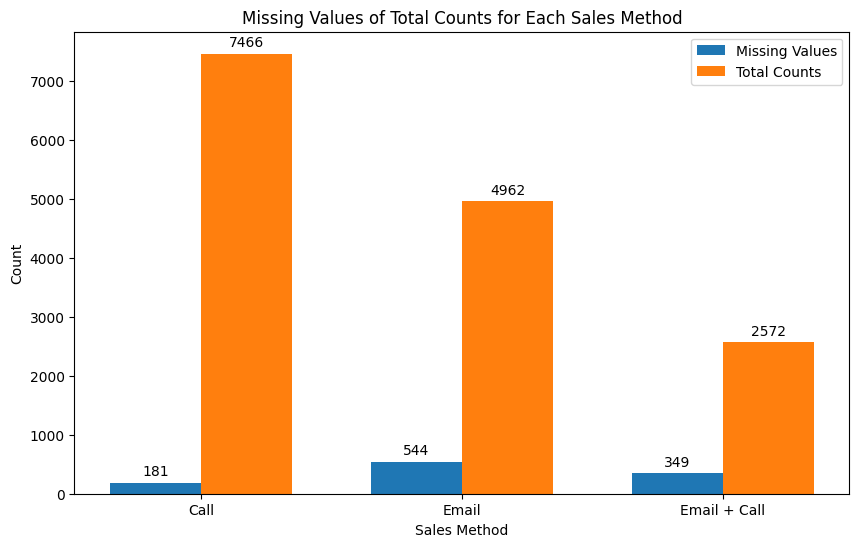

In [14]:
# Create a bar plot with grouped bars
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df['sales_method']))

bar1 = ax.bar(index, df['sales_method_missing_values'], bar_width, label='Missing Values')
bar2 = ax.bar(index + bar_width, df['sales_method_counts'], bar_width, label='Total Counts')

ax.set_xlabel('Sales Method')
ax.set_ylabel('Count')
ax.set_title('Missing Values of Total Counts for Each Sales Method')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['sales_method'])
ax.legend()
# Add values on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [15]:
sales['sales_method'].value_counts()

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64

In [16]:
sales['customer_id'].nunique()

15000

In [17]:
customer_id_length = sales['customer_id'].apply(lambda x: len(x))
customer_id_length.nunique()

1

In [18]:
sales = sales.dropna()
sales.shape

(13926, 8)

In [19]:
sales['nb_sold'].value_counts()

10    3424
9     3316
11    2276
8     1838
12     961
13     846
7      681
15     461
14      93
16      30
Name: nb_sold, dtype: int64

In [20]:
sales['years_as_customer'].value_counts()

1     2336
2     1841
3     1500
0     1348
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
20      53
19      53
22      38
21      36
24      24
26      19
23      16
25      16
27      14
30       9
33       8
28       8
34       7
31       6
32       5
29       5
35       5
36       4
39       2
38       2
37       2
63       1
47       1
Name: years_as_customer, dtype: int64

In [21]:
sales['nb_site_visits'].value_counts()

25    1557
26    1524
24    1477
23    1380
27    1345
22    1135
28    1074
21     862
29     821
30     609
20     567
19     400
31     329
32     234
18     208
17     101
33      99
16      79
34      40
15      29
35      27
36      13
14       7
37       4
13       4
12       1
Name: nb_site_visits, dtype: int64

In [22]:
sales['state'].value_counts()

California        1739
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode Islan

# Product Sales FINAL REPORT 
## Data Analyst Professional Practical Exam

***Yahia Chammami***
> Variables in the dataset were transformed into their respective appropriate data types as outlined below:

- `week` was converted to an integer.
- `sales_method` was converted to a factor.
- `customer_id` was converted to a character.
- `nb_sold` was converted to an integer.
- `revenue` was converted to a double, rounded to 2 decimal places.
- `years_as_customer` was converted to an integer.
- `nb_site_visits` was converted to an integer.
- `state` was converted to a factor.

> The dataset underwent a data cleaning process to align the variables with their specified descriptions and contains **15000 rows and 8 columns** before cleaning and validataion.After that, the dataset contains **13926 rows and 8 columns** without any missing values.

- `week` : This column aligns with the stated description, as it contains only six distinct weeks without any missing values. Thus, there is no requirement for modifications in this column.
- `sales_method` This column contains values that do not precisely match the specified descriptions. While most entries correctly represent 'Email', 'Call', and 'Email + Call', there are a few instances with variations such as 'em + call' and 'email'. To ensure data consistency and adhere to the predefined categories, we will perform a data transformation. Specifically, we will map 'em + call' to 'Email + Call', and 'email' to 'Email'
- `customer_id ` This column consists of 15,000 unique values, each with a consistent length of 36 characters. No modifications were applied.
- `nb_sold` This column contains values ranging from 7 to 16, and while the distribution might not be perfectly balanced, it is devoid of any outliers, misstyped values, or missing entries. Therefore, no modifications were performed on this column
- `revenue` This column contains 1,074 missing values, signifying about 7.16% of total observations. Upon thorough examination, no clear pattern emerged that could be used for imputation. To maintain the data's integrity and avoid introducing potential biases in subsequent analyses, the decision was made to drop these missing values.
- `years_as_customer` Based on the general observations of the 'years_as_customer' column, the values in this column range from 0 to 63. It was noticed that the value 63 corresponds to the year 1960, which is inconsistent with the dataset's timeframe (2023 - 63 = 1960). As per the expected threshold, the maximum value in this column should not exceed **39** (2023 - 1984 = 39). Upon closer examination, it was discovered that there were two outlier data points exceeding the expected threshold of 39. These two data points **(63 & 47)** represented just 0.001% of the total rows in the dataset. These outlier points were removed.
- `nb_site_visits` This column doesn't contain no missing values or outliers. No modifications were applied.
- `state` : that there are no repeated states, mispelled state names, or missing values, which reinforces the data's cleanliness and integrity. As a result, no modifications were required.

## Customers Specs in Different Groups
### How many customers were there for each approach?


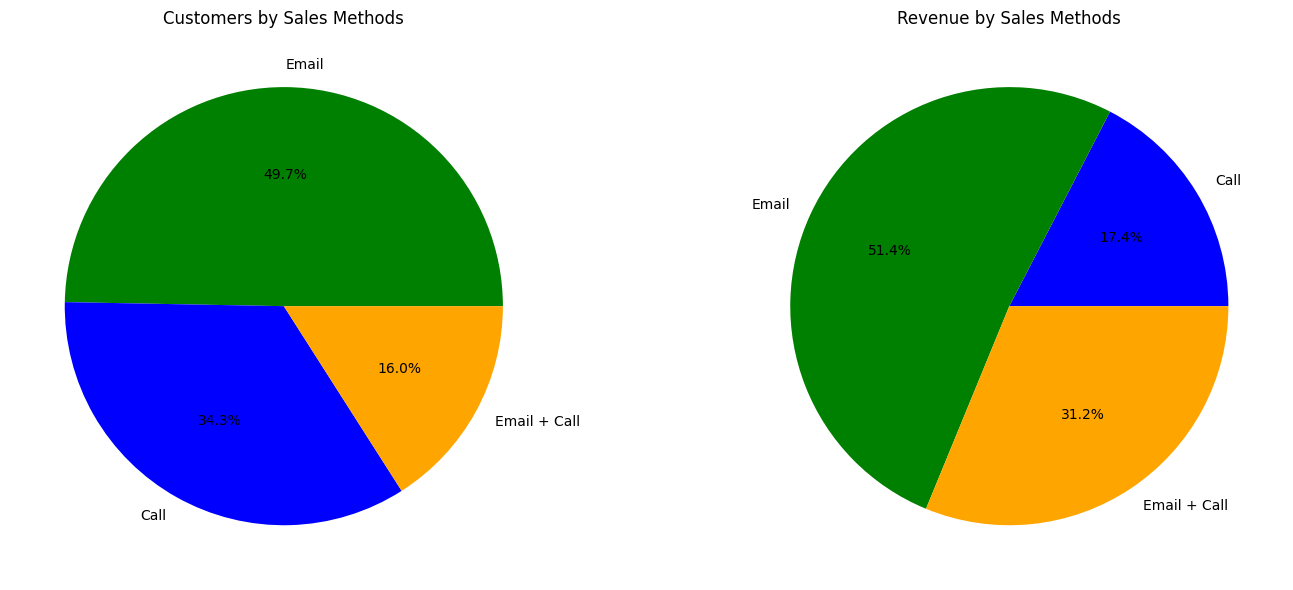

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sales' is your DataFrame containing sales data

# Define colors for each sales method
method_colors = {'Call': 'blue', 'Email': 'green', 'Email + Call': 'orange'}

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Customer counts by sales method
customer_counts = sales['sales_method'].value_counts()
axes[0].pie(customer_counts.values, labels=customer_counts.index, autopct='%1.1f%%', colors=[method_colors[method] for method in customer_counts.index])
axes[0].set_title('Customers by Sales Methods')

# Subplot 2: Revenue by sales methods
revenue_by_sales_method = sales.groupby('sales_method')['revenue'].sum()
axes[1].pie(revenue_by_sales_method.values, labels=revenue_by_sales_method.index, autopct='%1.1f%%', colors=[method_colors[method] for method in revenue_by_sales_method.index])
axes[1].set_title('Revenue by Sales Methods')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

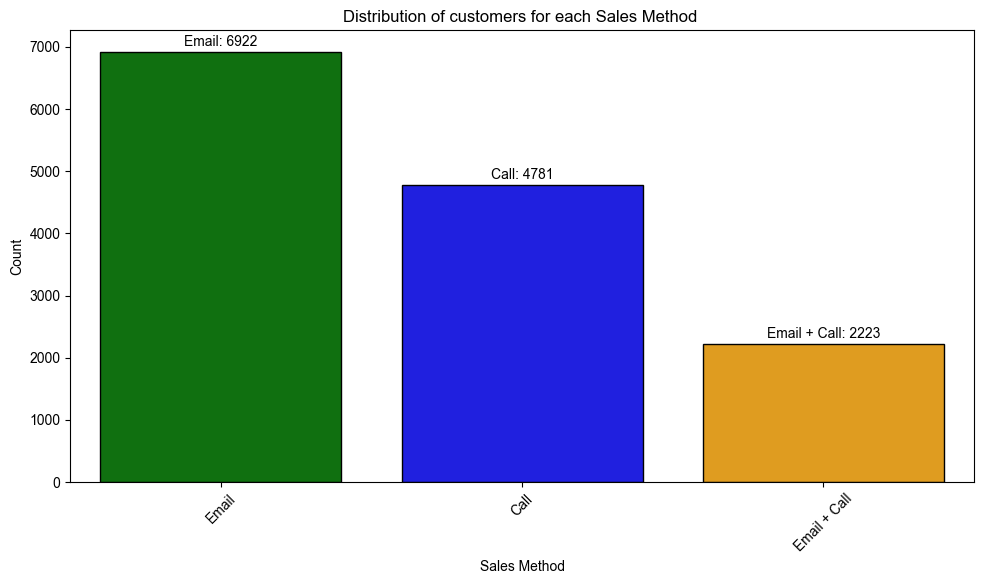

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define method colors
method_colors = {'Call': 'blue', 'Email': 'green', 'Email + Call': 'orange'}

plt.figure(figsize=(10, 6))

# Create the countplot with custom colors
sns.countplot(
    x='sales_method', 
    data=sales, 
    palette=[method_colors.get(method, 'gray') for method in sales_method_counts.index],  # Use sales_method_counts.index to ensure order
    order=sales_method_counts.index,  # Use the order of sales methods from sales_method_counts
    edgecolor='black'
)

# Calculate percentages
total_sales = len(sales)
sales_method_counts = sales['sales_method'].value_counts()

# Add values as text on the bars
for index, value in enumerate(sales_method_counts):
    plt.text(index, value + 100, f'{sales_method_counts.index[index]}: {value}', ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.title('Distribution of customers for each Sales Method ')

plt.xticks(rotation=45)

# Change background color
sns.set(style='whitegrid')

# Show the plot
plt.tight_layout()
plt.show()


> The pie plot and the bar plot represents the distribution of customers across different sales methods. Among the three sales methods," Email" represents the largest portion with 49.7% of customers with 6922 count, indicating its popularity among the customer base. "Call" follows with 34.3% of customers with 4781 count, suggesting that it is also a significant sales channel. The combination of "Email and Call" is the least preferred method, representing only 16% of customers with 2223 count.

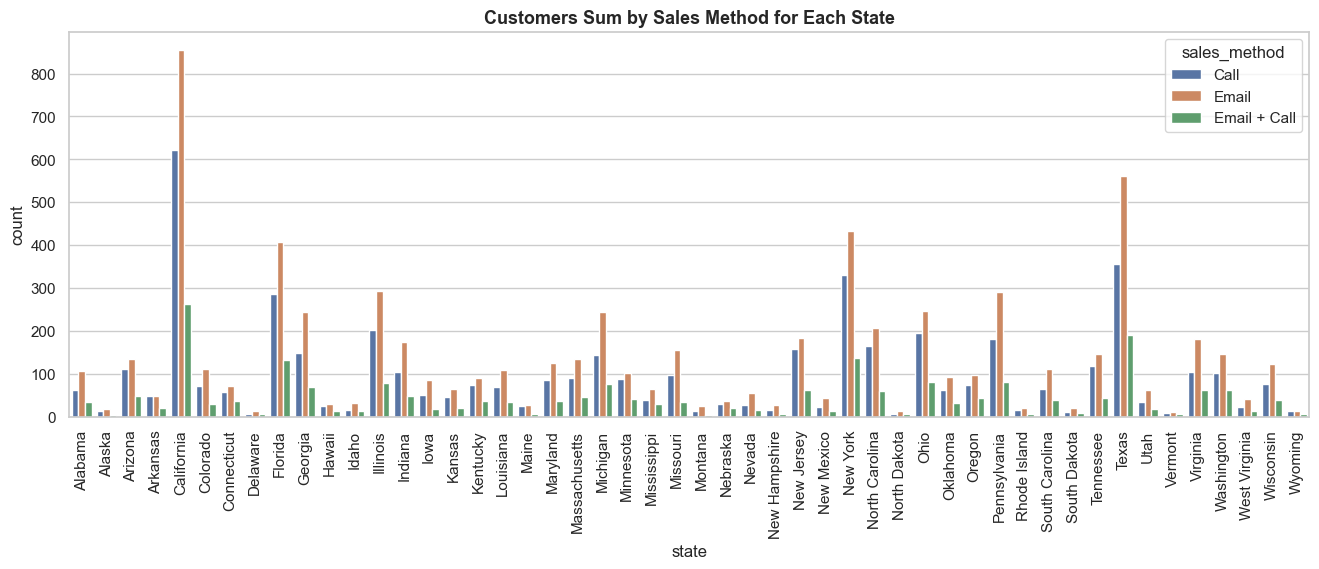

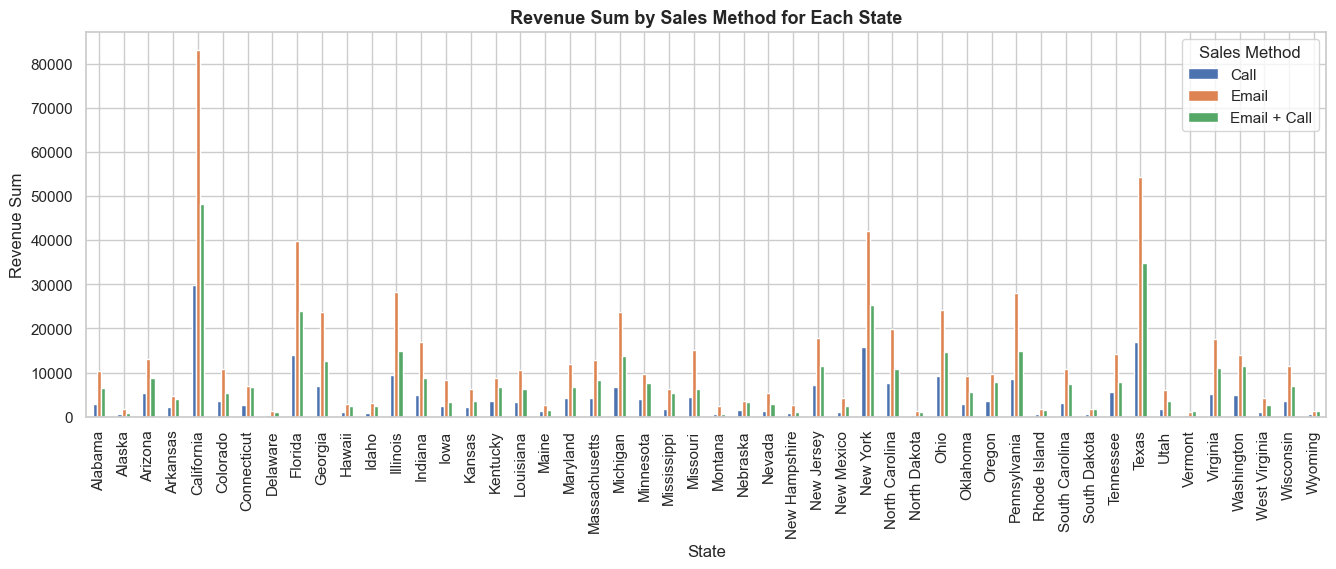

In [25]:
plt.figure(figsize=(16,5))
sns.countplot(data= sales, x='state',hue='sales_method')
plt.xticks(rotation=90)
title_font = {'fontweight': 'bold', 'fontsize': 13}
plt.title('Customers Sum by Sales Method for Each State', **title_font)
plt.show()

revenue_count = sales.groupby(['state', 'sales_method'])['revenue'].sum()
revenue_df = revenue_count.reset_index()
# Create a pivot table for easier plotting
pivot_table = revenue_df.pivot(index='state', columns='sales_method', values='revenue')

# Create a bar plot
pivot_table.plot(kind='bar', stacked=False, figsize=(16,5))
plt.title('Revenue Sum by Sales Method for Each State', **title_font)
plt.xlabel('State')
plt.ylabel('Revenue Sum')
plt.legend(title='Sales Method')
plt.show()

>  Moving forward, we delve into the analysis of customers and revenue generated in each state, segmented by sales methods. It is quite evident that in every state, the "Email" method holds the largest share of both customers and revenue. Additionally, when considering the "Email + Call" group, Texas and California emerge as the states with the highest number of customers and the greatest revenue generated



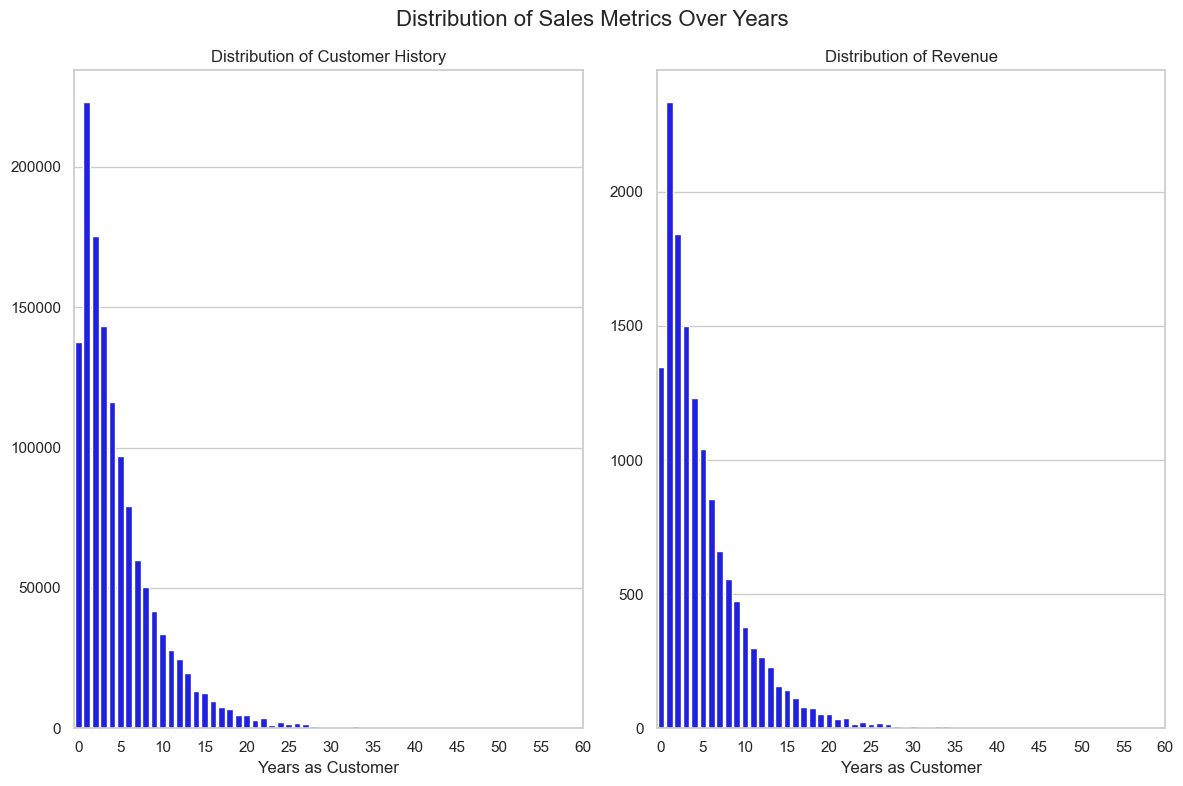

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
revenue_years = sales.groupby(['years_as_customer'])['revenue'].sum()
frequency_distribution = sales['years_as_customer'].value_counts()
# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Distribution of Sales Metrics Over Years', fontsize=16)

# First subplot: Histogram of Revenue per years
sns.barplot(x=revenue_years.index, y=revenue_years.values, ax=axes[0], color='blue')
axes[1].set_title('Distribution of Revenue')
axes[1].set_xlabel('Years as Customer')

# Set x-axis ticks for the first subplot
x_ticks_revenue = range(min(revenue_years.index), max(revenue_years.index)+1, 5)
axes[1].set_xticks(x_ticks_revenue)
axes[1].set_xticklabels(x_ticks_revenue)

# Second subplot: Distribution of customer history
sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, ax=axes[1], color='blue')
axes[0].set_title('Distribution of Customer History')
axes[0].set_xlabel('Years as Customer')

# Set x-axis ticks for the second subplot
x_ticks_history = range(min(frequency_distribution.index), max(frequency_distribution.index)+1, 5)
axes[0].set_xticks(x_ticks_history)
axes[0].set_xticklabels(x_ticks_history)
axes[1].set_xticks(x_ticks_history)
axes[1].set_xticklabels(x_ticks_history)
# Adjust layout and show the plots
plt.tight_layout()
plt.show()

>In the following graphs, We can also take a look at the distribution of the customers in total. it is obvious that the majority of the engagement belong to customers with less than 10 years history with the firm. On top of that customers with more than 30 years history have negligible engagement. If we look closer we can observe that customers with less history with the firm have generated more revenue.

### What does the spread of the revenue look like ?

In [27]:
overall_revenue_stats = sales['revenue'].describe()
method_revenue_stats = sales.groupby('sales_method')['revenue'].describe()
print(overall_revenue_stats)
print(method_revenue_stats)

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64
               count        mean        std  ...     50%     75%     max
sales_method                                 ...                        
Call          4781.0   47.597467   8.609899  ...   49.07   52.68   71.36
Email         6922.0   97.127684  11.210469  ...   95.58  105.17  148.97
Email + Call  2223.0  183.651233  29.083924  ...  184.74  191.11  238.32

[3 rows x 8 columns]


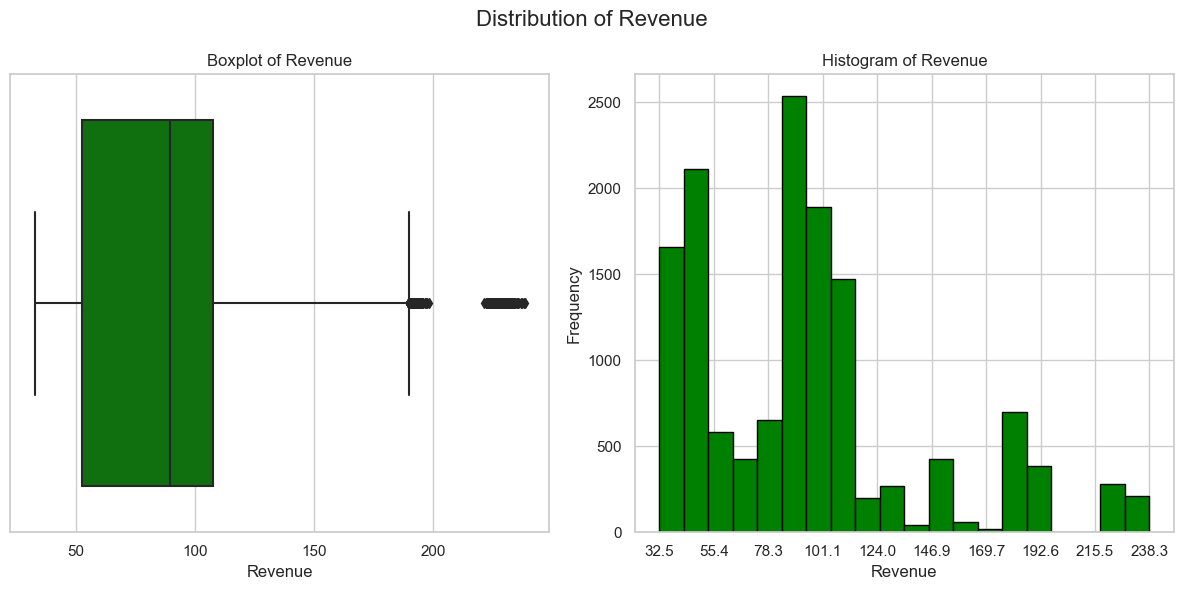

In [28]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Distribution of Revenue', fontsize=16)
# Create a boxplot for the 'revenue' column using Seaborn in the first subplot
sns.boxplot(x=sales['revenue'], color='green', ax=ax1)
ax1.set_xlabel('Revenue')
ax1.set_title('Boxplot of Revenue')

# Create a histogram for the 'revenue' column using Matplotlib in the second subplot
ax2.hist(sales['revenue'], bins=20,color='green', edgecolor='black')
ax2.set_xlabel('Revenue')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Revenue')
# Add more ticks to the histogram
num_ticks = 10
xticks = np.linspace(sales['revenue'].min(), sales['revenue'].max(), num_ticks)
ax2.set_xticks(xticks)
# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

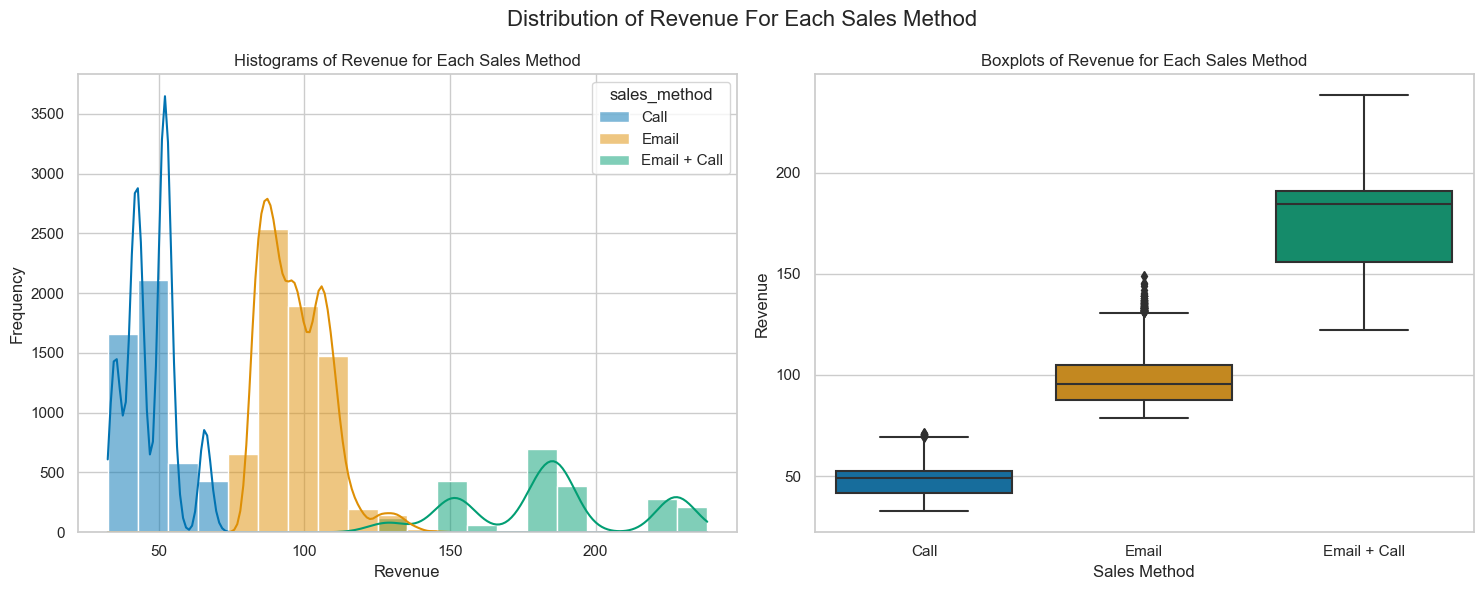

In [29]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of Revenue For Each Sales Method', fontsize=16)
# Subplot 1: Histograms for each sales method
sns.histplot(data=sales, x='revenue', hue='sales_method', kde=True, bins=20, palette='colorblind', ax=axes[0])
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histograms of Revenue for Each Sales Method')

# Subplot 2: Boxplots for each sales method
sns.boxplot(data=sales, x='sales_method', y='revenue', palette='colorblind', ax=axes[1])
axes[1].set_xlabel('Sales Method')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Boxplots of Revenue for Each Sales Method')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


> Before separating the methods' distribution, we observed that the revenue values range approximately from **30** to **230**, with a mean around **90**, as indicated by the boxplot. Analyzing the histogram, we noted that higher revenue values are less frequent, and the distribution exhibits two peaks around **90-100** and **40-50**.

> Upon breaking down the methods into three categories (Email, Call, and Email + Call), we discovered that the Email + Call method generated the highest average revenue, with its median being the highest among the three. However, when considering the overall revenue, the Email method outperformed the others since it was utilized most frequently. 

### Was there any difference in revenue over time for each of the methods?

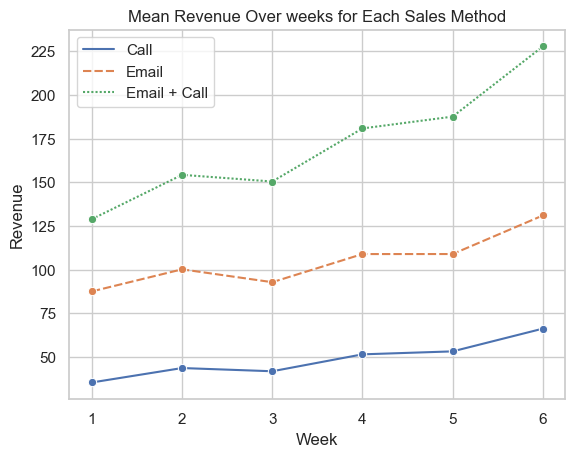

sales_method       Call       Email  Email + Call
week                                             
1             35.350243   87.496401    128.895649
2             43.602606  100.139121    154.246959
3             41.759528   92.762573    150.423272
4             51.446048  108.877141    180.822633
5             53.146087  108.892313    187.588343
6             66.166089  130.976519    227.770635


In [30]:
revenue_by_method_week = sales.groupby(['week', 'sales_method'])['revenue'].mean().unstack()
sns.lineplot(data=revenue_by_method_week, marker='o')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Mean Revenue Over weeks for Each Sales Method')
plt.legend()
plt.show()
print(revenue_by_method_week)


> Over the span of six weeks, three sales methods  "Call," "Email," and "Email and Call" exhibited distinct trends. The "Call" method displayed a steady sales increase, starting at 35.35 and peaking at 66.17 by week six. Similarly, the "Email" method began at 87.50 and rose to 130.98 by the final week. Impressively, the combined "Email and Call" strategy consistently outperformed both, with sales climbing from 128.90 in week one to 227.77 in week six. 
![9](9.png)
> The boxplot analysis of sales distribution over weeks suggests a quicker sales rate for the "Email" method compared to others. The declining sales trend over time with "Email" indicates swift transactions, while the rising trend with "Email + Call" hints at a potentially lengthier decision-making process. This might be due to the higher-priced items associated with the latter method, necessitating more thorough evaluation.

> Therefore, based solely on the given information, the "Email and Call" and "Email" methods can be considered the best methods for generating sales over time .

### Business Metric
- **Visit/Customer** is the total number of visits from our site over total number of customers in each method.
- **Sold/Visit** is the total number of sold items over the total number of visits from website we have gained.
- **Revenue/Sold** is the average revenue per the number of items we have sold.
- **Revenue/Customer** is the average revenue we have gained from each customer.

| Method | Visit/Customer | Sold/Visit | Revenue/Sold | Revenue/Customer |
| :---------------: | :---------------: | :---------------: | :---------------: | :---------------: |
|Call    | 24.42 | 0.38 | 5.00 | 47.59| 
|Email   | 24.73 | 0.39 | 9.98 |97.12 | 
|Email + Call| 26.73 | 0.45 | 15.06 | 183.65| 

These metrics are calculated for the first 6 weeks in the table below. It is observable that "Email + Call" has the best gain considering these metrics.


- Despite the fact that the sales approach of using only "Email" surpasses the effectiveness of using just "Call" or a combination of "Email And Call" across all states, the revenue generated from this method is not particularly high.
-  However, when both "Email" and "Call" are employed together as a sales strategy, the revenue significantly increases. The combined efforts of reaching out through email and following up with a phone call seem to have a synergistic effect, resulting in a higher success rate in converting prospects into customers and ultimately driving more revenue for the business. 
-  The personal touch and direct interaction provided by the call complement the initial contact made through email, leading to stronger customer engagement and higher chances of closing deals.
So, this method is certainly worth investing more on. 

### Sammary
>According to the data analysis, Email emerges as the preferred sales method among customers, closely followed by Call and Email + Call. During a six-week timeframe, Email sales demonstrated a consistent decline, while Call and Email + Call initially experienced growth, which later tapered off.

>Notably, the Email + Call approach achieved the highest average revenue per interaction. However, Email contributed the most to the overall revenue due to its more frequent usage. Finally, the Email method showed the most substantial revenue growth throughout the observed period.

### Recommendations
Based on the information provided, it appears that investing more in the "Email And Call" sales method could potentially lead to an increase in revenue for the company. The fact that the revenue is notably higher when both email and call are utilized suggests that this combined approach has a greater impact on driving sales compared to using email or call individually. By allocating resources and efforts towards implementing a comprehensive strategy that involves both email outreach and follow-up calls, the company may be able to enhance customer engagement, improve conversion rates, and ultimately generate more revenue. However, it's important to consider other factors such as the specific industry, target audience, and the company's overall sales objectives before making any investment decisions. Conducting further analysis and assessing the effectiveness of different sales methods within the company's specific context would be beneficial in determining the most appropriate course of action.
- Utilize Key Metrics: Monitor key metrics to assess any changes in the effectiveness and efficiency of each method. This will provide valuable insights into the performance of the different methods over time.

- Focus on "Email + Call" Method: To maximize profitability, consider allocating more resources to the "Email + Call" method. This can be done by implementing targeted campaigns in Texas and California before expanding to other states. Additionally, focus on customers with less history with the firm (i.e., less than 10 years) as they may be more responsive to this method.

- Maintain "Email" Method: As the "Email" method has proven to be the most efficient sales method, it is recommended to continue using it as is.
> By following these steps, you can continuously monitor the performance of each method, focus resources where they are most effective, and gather data for more comprehensive analysis to drive profitable outcomes.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation